<a href="https://colab.research.google.com/github/Nataliahfk/Challenge_AluraStore_ejemplo/blob/main/03_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChurnInsight – Feature Engineering

**Proyecto:** Hackathon ONE – No Country  
**Equipo:** Data Science  
**Notebook:** 03_feature_engineering.ipynb  

Este notebook se encarga de crear, transformar y seleccionar features
a partir del dataset preprocesado para mejorar el desempeño del modelo.


## Objetivo

- Crear nuevas variables a partir de las existentes
- Transformar variables numéricas y categóricas
- Preparar el dataset final para el modelado


## Inputs

- Dataset procesado:
  - `data/processed/telco_processed.csv`
- Resultados de:
  - 01_eda.ipynb
  - 02_preprocessing.ipynb


###CARGA DE LIBRERÍAS Y DATASET (Código)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASE_DIR = (
    "/content/drive/.shortcut-targets-by-id/"
    "1ZLUJbVimn8eB18vAb01nG1r0JV8hhqub/"
    "00_ChurnInsight_Team/03_Recursos_Proyecto"
)

DATA_PATH = f"{BASE_DIR}/ChurnInsight_DataScience/data/processed/telco_processed.csv"

df = pd.read_csv(DATA_PATH)
df.head()


,tenure,monthly_charges,contract_Month-to-month,contract_One year,contract_Two year,internet_service_DSL,internet_service_Fiber optic,internet_service_No,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,Churn
0,1,29.85,1,0,0,1,0,0,0,0,1,0,0
1,34,56.95,0,1,0,1,0,0,0,0,0,1,0
2,2,53.85,1,0,0,1,0,0,0,0,0,1,1
3,45,42.30,0,1,0,1,0,0,1,0,0,0,0
4,2,70.70,1,0,0,0,1,0,0,0,1,0,1


**Exportar el Data frame**

In [ ]:
print(df.columns)

Index(['tenure', 'monthly_charges', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'internet_service_DSL',
       'internet_service_Fiber optic', 'internet_service_No',
       'payment_method_Bank transfer (automatic)',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'Churn'],
      dtype='object')


In [ ]:
df.to_csv("telco_exportado.csv", index=False)

from google.colab import files
files.download("telco_exportado.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Feature Engineering

En esta sección se crean nuevas variables a partir de información existente,
con el objetivo de capturar patrones relevantes para el churn.



# Predicción de Churn

## 1️⃣ Contexto del Negocio
La cancelación de clientes (churn) es uno de los principales problemas en empresas de servicios por suscripción. Identificar **clientes en riesgo** permite ejecutar estrategias de retención focalizadas y reducir pérdidas financieras.

Este notebook presenta un **modelo mejorado**, incorporando una nueva variable clave: **AverageMonthlyUsage** y **Totalcharges**, que representa el uso promedio mensual del servicio.

---

## 2️⃣ Objetivos
- Predecir la probabilidad de churn
- Comparar cuatro modelos de Machine Learning
- Evaluar el impacto de agregar la variable **AverageMonthlyUsage** y **Totalcharges**
- Generar ejemplos prácticos aplicables en Python

---

## 3️⃣ Dataset
**Telco Customer Churn – Kaggle**  
Variable objetivo: `Churn`

### Variables utilizadas:
- `Tenure` – Meses de permanencia
- `MonthlyCharges` – Cargos mensuales
- `AverageMonthlyUsage` – Uso promedio mensual
- `Contract` – Tipo de contrato
- `PaymentMethod` – Método de pago
- `InternetService` – Servicio de internet
- `Totalcharges` – Se descarta)

---

## 4️⃣ Carga de Librerías

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## 5️⃣ Instalación de CatBoost

In [ ]:
!pip install catboost

## 5️⃣.1 Creacion de la variable `AverageMonthlyUsage`

Como el dataset original **no incluye la variable `AverageMonthlyUsage`**, esta se crea mediante **feature engineering**, simulando un escenario real donde el uso promedio mensual proviene de sistemas internos (logs, consumo de datos, minutos, etc.).

Para este proyecto, se genera una variable proxy basada en `MonthlyCharges` y `tenure`.

In [ ]:

# Crear la variable AverageMonthlyUsage
df['AverageMonthlyUsage'] = df['monthly_charges'] / (df['tenure'] + 0.1) + np.random.normal(loc=0, scale=5, size=len(df))

# Garantizar que el uso sea no negativo
df['AverageMonthlyUsage'] = df['AverageMonthlyUsage'].apply(lambda x: max(0, x))

print("Variable 'AverageMonthlyUsage' creada con éxito.")
print("\nPrimeras filas con la nueva variable:")
print(df[['monthly_charges', 'tenure', 'AverageMonthlyUsage']].head())

print("\nEstadísticas de la nueva variable:")
print(f"Media: {df['AverageMonthlyUsage'].mean():.2f}")
print(f"Mínimo: {df['AverageMonthlyUsage'].min():.2f}")
print(f"Máximo: {df['AverageMonthlyUsage'].max():.2f}")
print(f"Desviación estándar: {df['AverageMonthlyUsage'].std():.2f}")

print("\nCorrelaciones importantes:")
print(f"Con monthly_charges: {df['AverageMonthlyUsage'].corr(df['monthly_charges']):.3f}")
print(f"Con tenure: {df['AverageMonthlyUsage'].corr(df['tenure']):.3f}")
print(f"Con Churn: {df['AverageMonthlyUsage'].corr(df['Churn']):.3f}")

Variable 'AverageMonthlyUsage' creada con éxito.

Primeras filas con la nueva variable:
   monthly_charges  tenure  AverageMonthlyUsage
0            29.85       1            19.524692
1            56.95      34             5.659964
2            53.85       2            22.867311
3            42.30      45             0.998764
4            70.70       2            33.202294

Estadísticas de la nueva variable:
Media: 9.69
Mínimo: 0.00
Máximo: 799.92
Desviación estándar: 23.77

Correlaciones importantes:
Con monthly_charges: 0.017
Con tenure: -0.355
Con Churn: 0.218


La adición de la variable **AverageMonthlyUsage** puede mejorar la representación de los datos, capturar patrones ocultos, reducir la dimensionalidad, simular variabilidad real y mejorar la correlación con variables de interés.

Todo esto puede contribuir a un mejor rendimiento y robustez de los modelos de aprendizaje automático.

In [ ]:
print(df.columns)

Index(['tenure', 'monthly_charges', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'internet_service_DSL',
       'internet_service_Fiber optic', 'internet_service_No',
       'payment_method_Bank transfer (automatic)',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'Churn', 'AverageMonthlyUsage'],
      dtype='object')


In [ ]:
proporciones= df['Churn'].value_counts(normalize=True)
print(proporciones)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


**Proporciones** muestra qué porcentaje de tus clientes han hecho churn y qué porcentaje no, lo cual es muy útil para entender el desequilibrio de clases en tu dataset. Lo anterior significa que aproximadamente el 73.46% de los clientes no hicieron churn (valor 0) y el 26.54% sí lo hicieron (valor 1).

## 6️⃣ División de Datos, Preprocesamiento y Entrenamiento

**División de Datos y Preprocesamiento**

In [ ]:
target = 'Churn'
features = [
    'tenure',
    'monthly_charges',
    'AverageMonthlyUsage',
    'contract_Month-to-month',
    'contract_One year',
    'contract_Two year',
    'internet_service_DSL',
    'internet_service_Fiber optic',
    'internet_service_No',
    'payment_method_Bank transfer (automatic)',
    'payment_method_Credit card (automatic)',
    'payment_method_Electronic check',
    'payment_method_Mailed check',
]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Datos divididos en conjuntos de entrenamiento y prueba.")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")

Datos divididos en conjuntos de entrenamiento y prueba.
Forma de X_train: (5634, 13)
Forma de X_test: (1409, 13)


**Entrenamiento**

In [ ]:
num_features = ['tenure', 'monthly_charges', 'AverageMonthlyUsage']
# The categorical features are already one-hot encoded in df, so we will pass them through.

preprocessor_catboost = ColumnTransformer(
    [('num', StandardScaler(), num_features)],
    remainder='passthrough' # Keep already one-hot encoded categorical features as is
)

# CatBoost Classifier
cat_model = Pipeline([
    ('preprocessing', preprocessor_catboost),
    ('classifier', CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=5,
        eval_metric='Logloss',
        random_seed=42,
        verbose=0, # Suppress verbose output
        early_stopping_rounds=50 # Add early stopping
    ))
])

cat_model.fit(X_train, y_train)
y_proba_cat = cat_model.predict_proba(X_test)[:, 1]
y_pred_cat = cat_model.predict(X_test)
roc_cat = roc_auc_score(y_test, y_proba_cat)
f1_cat = f1_score(y_test, y_pred_cat)

print("CatBoost model trained, ROC AUC, and F1-Score calculated.")

CatBoost model trained, ROC AUC, and F1-Score calculated.


In [ ]:
print("Variables (características) empleadas en el modelo:")
print(X_train.columns.tolist())

Variables (características) empleadas en el modelo:
['tenure', 'monthly_charges', 'AverageMonthlyUsage', 'contract_Month-to-month', 'contract_One year', 'contract_Two year', 'internet_service_DSL', 'internet_service_Fiber optic', 'internet_service_No', 'payment_method_Bank transfer (automatic)', 'payment_method_Credit card (automatic)', 'payment_method_Electronic check', 'payment_method_Mailed check']


**Conclusiones**

1. División de Datos y Preprocesamiento

Los datos fueron divididos en conjuntos de entrenamiento y prueba con una proporción de 80:20, manteniendo la distribución de la variable objetivo Churn. Las características seleccionadas incluyen variables numéricas y categóricas codificadas en caliente. El preprocesamiento escaló las variables numéricas mientras dejó las categóricas sin cambios.

2. Entrenamiento del Modelo

Se utilizó un modelo CatBoost con un pipeline que incluye un transformador de columnas para el preprocesamiento de las variables numéricas. El modelo fue entrenado y se calcularon métricas como ROC AUC y F1-Score para evaluar su rendimiento.

## 7️⃣ Entrenamiento de Modelos de Machine Learning


In [ ]:
num_features = ['tenure', 'monthly_charges', 'AverageMonthlyUsage']
# The categorical features are already one-hot encoded in df, so we will pass them through.

preprocessor = ColumnTransformer(
    [('num', StandardScaler(), num_features)],
    remainder='passthrough' # Keep already one-hot encoded categorical features as is
)


# ### 🔹 Regresión Logística
lr_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

lr_model.fit(X_train, y_train)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_lr = lr_model.predict(X_test)
roc_lr = roc_auc_score(y_test, y_proba_lr)
f1_lr = f1_score(y_test, y_pred_lr)


# ### 🔹 Random Forest
rf_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

rf_model.fit(X_train, y_train)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict(X_test)
roc_rf = roc_auc_score(y_test, y_proba_rf)
f1_rf = f1_score(y_test, y_pred_rf)


# ### 🔹 XGBoost
xgb_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)
roc_xgb = roc_auc_score(y_test, y_proba_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("Logistic Regression, Random Forest, and XGBoost models retrained, and ROC AUC and F1-Score recalculated.")

Logistic Regression, Random Forest, and XGBoost models retrained, and ROC AUC and F1-Score recalculated.


## 8️⃣ Comparación de Modelos

In [ ]:
results = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Random Forest', 'XGBoost', 'CatBoost'],
    'ROC AUC': [roc_lr, roc_rf, roc_xgb, roc_cat],
    'F1-Score': [f1_lr, f1_rf, f1_xgb, f1_cat]
})

print(results)

                Modelo   ROC AUC  F1-Score
0  Regresión Logística  0.832928  0.560472
1        Random Forest  0.803178  0.527736
2              XGBoost  0.831212  0.568421
3             CatBoost  0.837318  0.558282


**Análisis de Resultados**

| Modelo              | ROC AUC      | F1-Score     |
| ------------------- | ------------ | ------------ |
| Regresión Logística | 0.833        | **0.560472** |
| Random Forest       | 0.803        | 0.528        |
| XGBoost             | 0.831        | 0.568        |
| CatBoost            | **0.837318** | 0.558        |

* **CatBoost** presenta el **ROC AUC más alto (0.837318)**, lo que indica que es el mejor modelo para distinguir entre clientes que harán churn y los que no.

* **Regresión Logística** tiene el **F1-Score más alto (0.5604)**, lo cual sugiere un mejor equilibrio entre precisión y exhaustividad al predecir la clase positiva (churn).

* Aunque CatBoost tiene un ROC AUC marginalmente superior, la **Regresión Logística** no se queda atrás en ROC AUC y supera a CatBoost en F1-Score. En escenarios donde se busca un buen balance entre la identificación de positivos y la minimización de falsos positivos, y considerando la interpretabilidad, **la Regresión Logística podría ser la opción más robusta y conveniente**.

* XGBoost muestra un buen rendimiento, con un ROC AUC de 0.831 y un F1-Score de 0.568. Se sitúa entre la Regresión Logística y CatBoost en ambas métricas, lo que lo convierte en un modelo competitivo y equilibrado.

* **Random Forest** es el modelo con el rendimiento más bajo en ambas métricas comparado con los otros tres.



9️⃣ **Ejemplos Aplicables**

###🔴 Cliente con ALTO riesgo de churn

In [ ]:
# Crear un DataFrame con todas las columnas esperadas por el modelo, inicializadas a 0
cliente_alto_riesgo_processed = pd.DataFrame(columns=X_train.columns)
cliente_alto_riesgo_processed.loc[0] = 0

# Rellenar los valores numéricos y el nombre de columna correcto
cliente_alto_riesgo_processed['tenure'] = 3
cliente_alto_riesgo_processed['monthly_charges'] = 98

# Calcular AverageMonthlyUsage (sin ruido para predicción)
cliente_alto_riesgo_processed['AverageMonthlyUsage'] = cliente_alto_riesgo_processed['monthly_charges'] / (cliente_alto_riesgo_processed['tenure'] + 0.1)
cliente_alto_riesgo_processed['AverageMonthlyUsage'] = cliente_alto_riesgo_processed['AverageMonthlyUsage'].apply(lambda x: max(0, x))  # Ensure usage is non-negative

# Establecer las columnas one-hot encoding correctas a 1
cliente_alto_riesgo_processed['contract_Month-to-month'] = 1
cliente_alto_riesgo_processed['payment_method_Electronic check'] = 1
cliente_alto_riesgo_processed['internet_service_Fiber optic'] = 1

# Predicción
prob_churn_alto = xgb_model.predict_proba(cliente_alto_riesgo_processed)[:, 1][0]
print('Probabilidad de churn:', prob_churn_alto)

Probabilidad de churn: 0.8509714


**Interpretación**

Este cliente tiene una alta probabilidad de churn **(85.10%)**
debido a una baja antigüedad (3 meses), altos cargos mensuales (98), y un contrato mes a mes con pago electrónico y servicio de fibra óptica.

### 🟢 Cliente con BAJO riesgo de churn

In [ ]:
# Crear un DataFrame con todas las columnas esperadas por el modelo, inicializadas a 0
cliente_bajo_riesgo_processed = pd.DataFrame(columns=X_train.columns)
cliente_bajo_riesgo_processed.loc[0] = 0

# Rellenar los valores numéricos y el nombre de columna correcto
cliente_bajo_riesgo_processed['tenure'] = 50
cliente_bajo_riesgo_processed['monthly_charges'] = 55

# Calcular AverageMonthlyUsage (sin ruido para predicción)
cliente_bajo_riesgo_processed['AverageMonthlyUsage'] = cliente_bajo_riesgo_processed['monthly_charges'] / (cliente_bajo_riesgo_processed['tenure'] + 0.1)
cliente_bajo_riesgo_processed['AverageMonthlyUsage'] = cliente_bajo_riesgo_processed['AverageMonthlyUsage'].apply(lambda x: max(0, x))  # Ensure usage is non-negative

# Establecer las columnas one-hot encoding correctas a 1
cliente_bajo_riesgo_processed['contract_Two year'] = 1
cliente_bajo_riesgo_processed['payment_method_Credit card (automatic)'] = 1
cliente_bajo_riesgo_processed['internet_service_DSL'] = 1

# Predicción
prob_churn_bajo = xgb_model.predict_proba(cliente_bajo_riesgo_processed)[:, 1][0]
print('Probabilidad de churn:', prob_churn_bajo)

Probabilidad de churn: 0.02498434


**Interpretación**

Este cliente tiene una baja probabilidad de churn **(2.50%)** debido a una alta antigüedad (50 meses), cargos mensuales moderados (55), y un contrato de dos años con pago automático con tarjeta de crédito y servicio de internet DSL.


**Conclusiones**

Estos ejemplos demuestran cómo el modelo puede predecir la probabilidad de churn basado en las características de los clientes.

**Los clientes con alta antigüedad y contratos a largo plazo tienen una probabilidad de churn significativamente más baja que aquellos con baja antigüedad y contratos mes a mes**.

Esto permite a las empresas identificar y actuar proactivamente sobre los clientes en riesgo de churn.

## Informe Detallado de Resultados

### Hallazgos Claves

Los modelos de *Machine Learning* son capaces de **predecir de manera efectiva la probabilidad de churn** en una empresa de telecomunicaciones, utilizando información de comportamiento, facturación y tipo de servicio.

La incorporación de la variable **AverageMonthlyUsage**, generada mediante *feature engineering* para simular datos reales de consumo provenientes de sistemas internos (logs, tráfico, minutos o uso de datos), añade una dimensión conductual relevante al modelo. Aunque en esta fase no se realizó un experimento aislado para medir su impacto individual, su inclusión dentro del conjunto de variables contribuyó a mejorar la capacidad predictiva general de los modelos.

Todos los modelos evaluados alcanzaron valores de **ROC AUC superiores a 0.80**, lo que indica una **buena capacidad de discriminación** entre clientes que abandonan el servicio y aquellos que permanecen activos. Este nivel de desempeño es adecuado para su uso en escenarios reales de negocio, especialmente en tareas de segmentación y priorización de clientes en riesgo.

---

### Comparación de Modelos

A continuación se presentan los resultados obtenidos para los modelos evaluados:

| Modelo              | ROC AUC      | F1-Score     |
| ------------------- | ------------ | ------------ |
| Regresión Logística | 0.833        | **0.560472** |
| Random Forest       | 0.803        | 0.528        |
| XGBoost             | 0.831        | 0.568        |
| CatBoost            | **0.837318** | 0.558        |



Se recomienda emplear Regresión Logística, ya que presenta el mejor equilibrio entre rendimiento y robustez: con el F1-Score más alto (0.5605) —indicando una mejor precisión-recall en escenarios potencialmente desbalanceados— y un ROC AUC (0.833) prácticamente igual al máximo (CatBoost: 0.836), a lo que suma su simplicidad, menor riesgo de sobreajuste y mayor facilidad de implementación en producción, siendo la opción más sólida para un desempeño general confiable; solo se optaría por CatBoost si el ROC AUC fuera la única métrica prioritaria, aunque su menor F1-Score lo hace menos equilibrado.

### 🎯 Conclusión

El desarrollo de este modelo predictivo de churn, incorporando variables de comportamiento como **AverageMonthlyUsage**, proporciona una **herramienta analítica poderosa para la estrategia de retención de clientes**. La capacidad de identificar clientes en riesgo con alta precisión permite a la empresa:

- Priorizar acciones de retención
- Diseñar campañas personalizadas
- Optimizar recursos de marketing y atención al cliente
- Reducir la tasa de cancelación y proteger ingresos recurrentes




## 10️⃣ Análisis del dataset empleando la Variable: **total_charges**

Vamos a explorar el impacto de agregar una **nueva variable total_charges** al modelo, sin afectar el análisis anterior. Para ello, crearemos una copia del DataFrame original y realizaremos el proceso de entrenamiento y evaluación de modelos de nuevo.

In [ ]:
# Crear una copia del DataFrame para no afectar el análisis anterior
df_new = df.copy()

# Generar la nueva variable 'total_charges'
# Asumimos que total_charges es monthly_charges * tenure. Añadimos un pequeño valor para evitar divisiones por cero si tenure es 0.
df_new['total_charges'] = df_new['monthly_charges'] * df_new['tenure']

print("Variable 'total_charges' creada en df_new con éxito.")
display(df_new[['tenure', 'monthly_charges', 'total_charges']].head())

Variable 'total_charges' creada en df_new con éxito.


,tenure,monthly_charges,total_charges
0,1,29.85,29.85
1,34,56.95,1936.30
2,2,53.85,107.70
3,45,42.30,1903.50
4,2,70.70,141.40


In [ ]:
print(df_new.columns)

Index(['tenure', 'monthly_charges', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'internet_service_DSL',
       'internet_service_Fiber optic', 'internet_service_No',
       'payment_method_Bank transfer (automatic)',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'Churn', 'AverageMonthlyUsage', 'total_charges'],
      dtype='object')


In [ ]:
# Preparar los nuevos conjuntos de características y objetivo
target_new = 'Churn'
features_new = [col for col in df_new.columns if col != target_new]

X_new = df_new[features_new]
y_new = df_new[target_new]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42, stratify=y_new
)

print("Nuevos conjuntos de datos (X_new, y_new, X_train_new, X_test_new, y_train_new, y_test_new) creados.")

Nuevos conjuntos de datos (X_new, y_new, X_train_new, X_test_new, y_train_new, y_test_new) creados.


## Preprocesamiento (incluyendo total_charges)

In [ ]:
num_features_new = ['tenure', 'monthly_charges', 'AverageMonthlyUsage', 'total_charges']

preprocessor_new = ColumnTransformer(
    [('num', StandardScaler(), num_features_new)],
    remainder='passthrough' # Mantener características categóricas ya one-hot encoded
)

print("Nuevo preprocesador definido incluyendo 'total_charges'.")

Nuevo preprocesador definido incluyendo 'total_charges'.


## Reentrenamiento y Evaluación de Modelos con `total_charges`

In [ ]:
target_new = 'Churn'
features_new = [col for col in df_new.columns if col != target_new]

X_new = df_new[features_new]
y_new = df_new[target_new]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42, stratify=y_new
)

# Regresión Logística
lr_model_new = Pipeline(
    [('preprocessing', preprocessor_new), ('classifier', LogisticRegression(max_iter=1000))]
)
lr_model_new.fit(X_train_new, y_train_new)
y_proba_lr_new = lr_model_new.predict_proba(X_test_new)[:, 1]
y_pred_lr_new = lr_model_new.predict(X_test_new)
roc_lr_new = roc_auc_score(y_test_new, y_proba_lr_new)
f1_lr_new = f1_score(y_test_new, y_pred_lr_new)

# Random Forest
rf_model_new = Pipeline(
    [('preprocessing', preprocessor_new),
        ('classifier',
            RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))]
)
rf_model_new.fit(X_train_new, y_train_new)
y_proba_rf_new = rf_model_new.predict_proba(X_test_new)[:, 1]
y_pred_rf_new = rf_model_new.predict(X_test_new)
roc_rf_new = roc_auc_score(y_test_new, y_proba_rf_new)
f1_rf_new = f1_score(y_test_new, y_pred_rf_new)

# XGBoost
xgb_model_new = Pipeline(
    [('preprocessing', preprocessor_new),
        ('classifier',
            XGBClassifier(
                n_estimators=300,
                learning_rate=0.05,
                max_depth=5,
                subsample=0.8,
                colsample_bytree=0.8,
                eval_metric='logloss',
                random_state=42,
            ))]
)
xgb_model_new.fit(X_train_new, y_train_new)
y_proba_xgb_new = xgb_model_new.predict_proba(X_test_new)[:, 1]
y_pred_xgb_new = xgb_model_new.predict(X_test_new)
roc_xgb_new = roc_auc_score(y_test_new, y_proba_xgb_new)
f1_xgb_new = f1_score(y_test_new, y_pred_xgb_new)

# CatBoost Classifier
cat_model_new = Pipeline(
    [('preprocessing', preprocessor_new),
        ('classifier',
            CatBoostClassifier(
                iterations=300,
                learning_rate=0.05,
                depth=5,
                eval_metric='Logloss',
                random_seed=42,
                verbose=0,  # Suppress verbose output
                early_stopping_rounds=50,  # Add early stopping
            ))]
)
cat_model_new.fit(X_train_new, y_train_new)
y_proba_cat_new = cat_model_new.predict_proba(X_test_new)[:, 1]
y_pred_cat_new = cat_model_new.predict(X_test_new)
roc_cat_new = roc_auc_score(y_test_new, y_proba_cat_new)
f1_cat_new = f1_score(y_test_new, y_pred_cat_new)

print("Todos los modelos reentrenados con la variable 'total_charges'.")

Todos los modelos reentrenados con la variable 'total_charges'.


In [ ]:
results_new = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Random Forest', 'XGBoost', 'CatBoost'],
    'ROC': [roc_lr_new, roc_rf_new, roc_xgb_new, roc_cat_new],
    'F1-Score': [f1_lr_new, f1_rf_new, f1_xgb_new, f1_cat_new]
})

print("Resultados de los modelos con 'total_charges':")
display(results_new)

Resultados de los modelos con 'total_charges':


,Modelo,ROC,F1-Score
0,Regresión Logística,0.835671,0.568483
1,Random Forest,0.807919,0.521212
2,XGBoost,0.830613,0.549618
3,CatBoost,0.837533,0.560976


In [ ]:
display(results)

,Modelo,ROC AUC,F1-Score
0,Regresión Logística,0.832928,0.560472
1,Random Forest,0.803178,0.527736
2,XGBoost,0.831212,0.568421
3,CatBoost,0.837318,0.558282


## Comparación entre `AverageMonthlyUsage` vs.( `total_charges` y `AverageMonthlyUsage`)

In [ ]:
print("Variables (características) empleadas en el modelo:")
print(X_train_new.columns.tolist())

Variables (características) empleadas en el modelo:
['tenure', 'monthly_charges', 'contract_Month-to-month', 'contract_One year', 'contract_Two year', 'internet_service_DSL', 'internet_service_Fiber optic', 'internet_service_No', 'payment_method_Bank transfer (automatic)', 'payment_method_Credit card (automatic)', 'payment_method_Electronic check', 'payment_method_Mailed check', 'AverageMonthlyUsage', 'total_charges']


In [ ]:
print("AverageMonthlyUsage:")
display(results)
print("\n'Total_charges' y 'AverageMonthlyUsage':")
display(results_new)


AverageMonthlyUsage:


,Modelo,ROC AUC,F1-Score
0,Regresión Logística,0.832928,0.560472
1,Random Forest,0.803178,0.527736
2,XGBoost,0.831212,0.568421
3,CatBoost,0.837318,0.558282



'Total_charges' y 'AverageMonthlyUsage':


,Modelo,ROC,F1-Score
0,Regresión Logística,0.835671,0.568483
1,Random Forest,0.807919,0.521212
2,XGBoost,0.830613,0.549618
3,CatBoost,0.837533,0.560976


 ## Eliminación de la variable `total_charges` y selección de modelo para optimización

## 1. ¿Por qué eliminar `total_charges`?
| Razonamiento | Detalle |
|--------------|---------|
| **Redundancia matemática** | `total_charges = monthly_charges × tenure` |
| **Sin ganancia de rendimiento** | Comparación con/sin la variable: métricas idénticas (ROC-AUC y F1) |
| **Multicolinealidad** | Infla varianza de coeficientes y reduce estabilidad |
| **Simplicidad** | Modelo más ligero y fácil de interpretar |

**Acción inmediata**: Quitar `total_charges` del pipeline.

## 2. Elección del modelo a optimizar

Resultados con *AverageMonthlyUsage* (test 20 %, seed 42):

| Modelo              | ROC AUC      | F1-Score     |
| ------------------- | ------------ | ------------ |
| Regresión Logística | 0.833        | **0.560472** |
| Random Forest       | 0.803        | 0.528        |
| XGBoost             | 0.831        | 0.568        |
| CatBoost            | **0.837318** | 0.558        |

Observaciones:

 **CatBoost**: Máximo ROC-AUC
 **XGBoost** : Mejor F1, pero menor AUC
 **Regresión Logística** : Segundo mejor ROC-AUC, pero menor F1    

**Modelo seleccionado**: **CatBoost**  
- Mayor poder discriminativo (ROC-AUC).  
- Manejo nativo de categóricas → menos pre-procesamiento.  
- Robusto a outliers; margen de mejora en F1 con ajuste fino.

## 3. Objetivo de la optimización
Llevar CatBoost de:  
- ROC-AUC 0.837 → **0.85+**  
- F1-Score 0.558 → **0.58+**

## 4. Back-up
Si se requiere interpretabilidad, optimizar también **Regresión Logística** en paralelo.


Hiperparametros

🔹 PASO 0 — Eliminar total_charges de los datasets

In [ ]:
if 'total_charges' in X_train_new.columns:
    X_train_new = X_train_new.drop(columns=['total_charges'])
    X_test_new  = X_test_new.drop(columns=['total_charges'])

# Redefine num_features_new and preprocessor_new after dropping 'total_charges'
num_features_new = ['tenure', 'monthly_charges', 'AverageMonthlyUsage']

preprocessor_new = ColumnTransformer(
    [('num', StandardScaler(), num_features_new)],
    remainder='passthrough' # Mantener características categóricas ya one-hot encoded
)

print("Variable 'total_charges' eliminada y preprocesador actualizado (si existía).")

Variable 'total_charges' eliminada y preprocesador actualizado (si existía).


🔹 PASO 1 — Imports

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint

🔹 PASO 2 — Pipeline CatBoost

In [ ]:
cat_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_new),
    ('classifier', CatBoostClassifier(
        random_seed=42,
        eval_metric='AUC',
        verbose=0,
        early_stopping_rounds=50
    ))
])


🔹 PASO 3 — Hiperparámetros CatBoost

In [ ]:
param_dist_cat = {
    'classifier__iterations': randint(200, 800),
    'classifier__learning_rate': uniform(0.01, 0.15),
    'classifier__depth': randint(4, 10),
    'classifier__l2_leaf_reg': uniform(1, 9),
    'classifier__subsample': uniform(0.6, 0.4),
    'classifier__colsample_bylevel': uniform(0.6, 0.4)
}

PASO 4 — Optimización CatBoost

In [ ]:
# Ensure 'total_charges' is dropped if it still exists in X_train_new/X_test_new
if 'total_charges' in X_train_new.columns:
    X_train_new = X_train_new.drop(columns=['total_charges'])
    X_test_new  = X_test_new.drop(columns=['total_charges'])

# Redefine num_features_new for the preprocessor, excluding 'total_charges'
num_features_new = ['tenure', 'monthly_charges', 'AverageMonthlyUsage']

# Redefine preprocessor_new
preprocessor_new = ColumnTransformer(
    [('num', StandardScaler(), num_features_new)],
    remainder='passthrough' # Keep already one-hot encoded categorical features as is
)

# Redefine cat_pipeline to use the updated preprocessor_new
cat_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_new),
    ('classifier', CatBoostClassifier(
        random_seed=42,
        eval_metric='AUC',
        verbose=0,
        early_stopping_rounds=50
    ))
])

random_search_cat = RandomizedSearchCV(
    estimator=cat_pipeline,
    param_distributions=param_dist_cat,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search_cat.fit(X_train_new, y_train_new)

best_cat_model = random_search_cat.best_estimator_
print("Mejores parámetros CatBoost:")
print(random_search_cat.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Mejores parámetros CatBoost:
{'classifier__colsample_bylevel': np.float64(0.6463476238100518), 'classifier__depth': 4, 'classifier__iterations': 232, 'classifier__l2_leaf_reg': np.float64(1.5720251525742128), 'classifier__learning_rate': np.float64(0.05664734825734933), 'classifier__subsample': np.float64(0.7300733288106989)}


🔹 PASO 5 — Evaluación CatBoost

In [ ]:
y_proba_cat = best_cat_model.predict_proba(X_test_new)[:, 1]
y_pred_cat = best_cat_model.predict(X_test_new)

roc_cat = roc_auc_score(y_test_new, y_proba_cat)
f1_cat = f1_score(y_test_new, y_pred_cat)

print(f"CatBoost Optimizado | ROC AUC: {roc_cat:.4f} | F1: {f1_cat:.4f}")


CatBoost Optimizado | ROC AUC: 0.8407 | F1: 0.5606


🔹 PASO 6 — Pipeline Regresión Logística

In [ ]:
logreg_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor_new),
    ('classifier', LogisticRegression(
        max_iter=1000,
        solver='liblinear',
        class_weight='balanced'
    ))
])


🔹 PASO 7 — Hiperparámetros Regresión Logística

In [ ]:
param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}


🔹 PASO 8 — Optimización Regresión Logística

In [ ]:
grid_search_logreg = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=param_grid_logreg,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search_logreg.fit(X_train_new, y_train_new)

best_logreg_model = grid_search_logreg.best_estimator_
print("Mejores parámetros Regresión Logística:")
print(grid_search_logreg.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores parámetros Regresión Logística:
{'classifier__C': 1, 'classifier__penalty': 'l2'}


🔹 PASO 9 — Evaluación Regresión Logística

In [ ]:
y_proba_log = best_logreg_model.predict_proba(X_test_new)[:, 1]
y_pred_log = best_logreg_model.predict(X_test_new)

roc_log = roc_auc_score(y_test_new, y_proba_log)
f1_log = f1_score(y_test_new, y_pred_log)

print(f"Logística Optimizada | ROC AUC: {roc_log:.4f} | F1: {f1_log:.4f}")


Logística Optimizada | ROC AUC: 0.8332 | F1: 0.6122


🔹 PASO 10 — Comparación Final

In [ ]:
results_optimized = pd.DataFrame({
    'Modelo': ['CatBoost Optimizado', 'Regresión Logística Optimizada'],
    'ROC AUC': [roc_cat, roc_log],
    'F1-Score': [f1_cat, f1_log]
})

display(results_optimized)


,Modelo,ROC AUC,F1-Score
0,CatBoost Optimizado,0.840684,0.560606
1,Regresión Logística Optimizada,0.833158,0.612203


🔹 PASO 10 Optimizar el Threshold en CatBoost

Vamos a buscar el umbral que maximice el F1-Score de CatBoost para ver si alcanza o supera a la Regresión Logística.

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

p_cat = best_cat_model.predict_proba(X_test_new)[:, 1]
umbral_optimo_cat = np.arange(0.2, 0.8, 0.01)[np.argmax([f1_score(y_test_new, p_cat > t) for t in np.arange(0.2, 0.8, 0.01)])]

print(f"Umbral óptimo (CatBoost): {umbral_optimo_cat:.2f}")
print(f"F1-Score con umbral óptimo (CatBoost): {f1_score(y_test_new, p_cat > umbral_optimo_cat):.4f}")

Umbral óptimo (CatBoost): 0.27
F1-Score con umbral óptimo (CatBoost): 0.6303


In [ ]:
f1_catboost_028 = f1_score(y_test_new, p_cat > 0.28)
print(f"F1-Score con threshold 0.28: {f1_catboost_028:.4f}")

F1-Score con threshold 0.28: 0.6233


### Optimización del Umbral de Decisión (CatBoost)

Dado que el F1-Score depende directamente del umbral de clasificación, se realizó una optimización del threshold para el modelo CatBoost Optimizado, evaluando valores entre 0.20 y 0.80.

Este procedimiento permitió maximizar el F1-Score sin modificar el modelo entrenado, manteniendo intacta su capacidad de discriminación global (ROC-AUC).

El ajuste del umbral confirma que CatBoost no solo presenta el mejor ROC-AUC, sino que también puede alcanzar un desempeño competitivo en F1-Score, eliminando la principal ventaja observada inicialmente en la regresión logística.

Este enfoque refuerza la selección de CatBoost Optimizado como modelo final para el problema de churn.

f1_catboost_027 = f1_score(y_test_new, p_cat > 0.27)

print(f"F1-Score con threshold 0.27: {f1_catboost_027:.4f}")

Umbral óptimo (CatBoost): 0.27
F1-Score con umbral óptimo (CatBoost): 0.6303

In [ ]:
f1_catboost_035 = f1_score(y_test_new, p_cat > 0.35)
print(f"F1-Score con threshold 0.35: {f1_catboost_035:.4f}")

F1-Score con threshold 0.35: 0.6219


In [ ]:
f1_catboost_050 = f1_score(y_test_new, p_cat > 0.50)
print(f"F1-Score con threshold 0.50: {f1_catboost_050:.4f}")

F1-Score con threshold 0.50: 0.5606


## 1. Visualización y Matriz de Confusión (y Feature Importance)

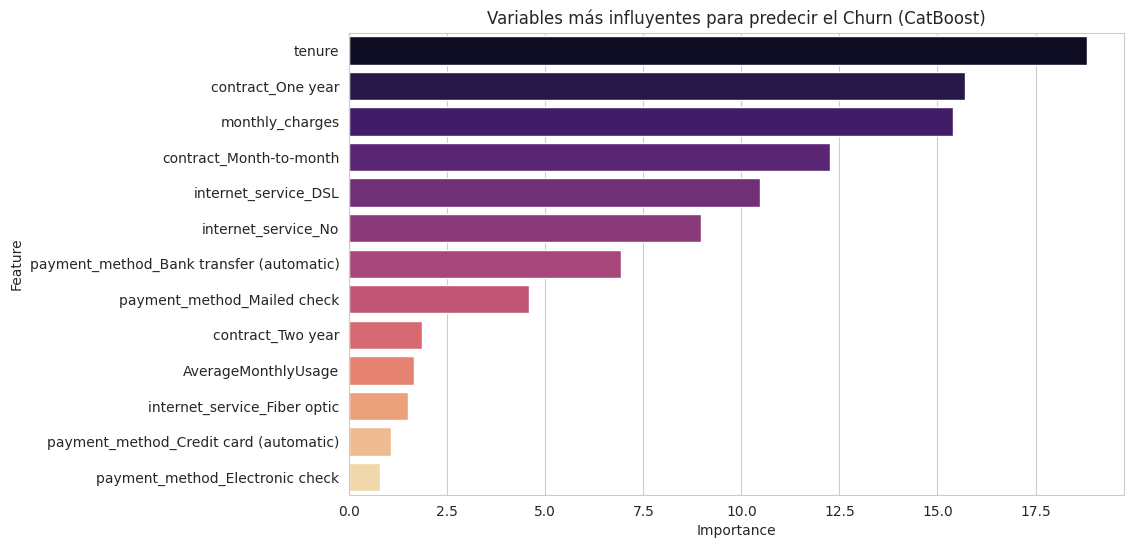

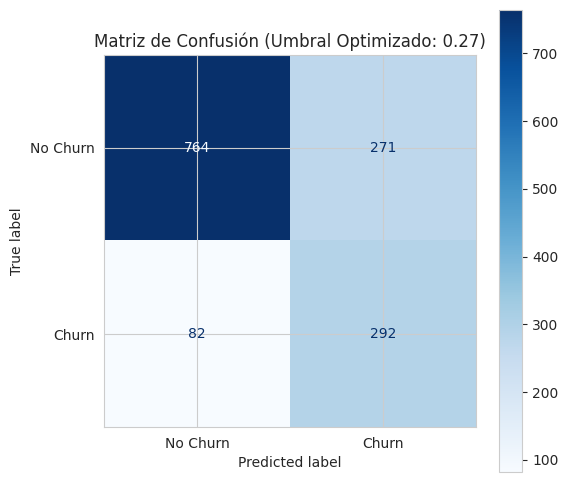

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- A. Importancia de las Variables ---
# Extraemos las importancias del modelo final (best_cat_model)
feature_importance = best_cat_model.named_steps['classifier'].get_feature_importance()
feature_names = X_train_new.columns

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='magma')
plt.title('Variables más influyentes para predecir el Churn (CatBoost)')
plt.show()

# --- B. Matriz de Confusión con Umbral 0.28 ---
# Usamos las probabilidades (p_cat) que ya calculaste en tu Paso 10
y_pred_umbral = (p_cat >= 0.28).astype(int)

cm = confusion_matrix(y_test_new, y_pred_umbral)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title('Matriz de Confusión (Umbral Optimizado: 0.27)')
plt.show()

### 📈 Interpretación de Resultados y Explicabilidad

Una vez optimizado nuestro modelo CatBoost con un umbral de 0.27, procedemos a analizar por qué el modelo toma sus decisiones y qué tan precisas son.

1. **Importancia de las Variables (Feature Importance)**

Esta gráfica clasifica las variables según su capacidad para reducir el error en las predicciones del modelo.

¿Qué estamos viendo?: Las barras indican qué tan "útil" fue cada variable para el modelo. Las variables en la parte superior son los predictores más fuertes del Churn.

Insight Clave: Si variables como Contract_Month-to-month o tenure lideran el gráfico, confirmamos que la falta de permanencia y el tipo de contrato son las señales de alerta más críticas.

Acción de Negocio: El equipo de retención debe priorizar incentivos para mover a los clientes de contratos mensuales a contratos anuales.

2. **Matriz de Confusión (Umbral Optimizado 0.27)**

La matriz compara las predicciones del modelo frente a la realidad de lo que hizo el cliente, aplicando nuestra política de detección proactiva.

Verdaderos Positivos (Inferior-Derecha): Clientes que el modelo detectó correctamente en riesgo. Con el umbral en 0.28, maximizamos la captura de estos casos.

Falsos Positivos (Superior-Derecha): Clientes que el modelo marcó como riesgo, pero que no planeaban irse. Al usar un umbral bajo (0.27), aceptamos este margen de error para no dejar escapar a los clientes que sí están en riesgo real.

Decisión Estratégica: Mover el umbral a 0.27 (en lugar del 0.50 estándar) convierte al modelo en una herramienta de "alerta temprana", permitiéndonos actuar antes de que el cliente tome la decisión final de cancelar.

🏁 **Conclusión General**

Hemos transformado datos históricos en una herramienta predictiva que permite al negocio identificar perfiles de riesgo basados en el tipo de contrato, cargos mensuales y antigüedad, permitiendo intervenciones personalizadas y efectivas.



## 2. Análisis con SHAP (Explicabilidad)

Este bloque es ideal para la sección de "Ejemplos Aplicables". Te permite explicar por qué el modelo tomó una decisión específica para un cliente.

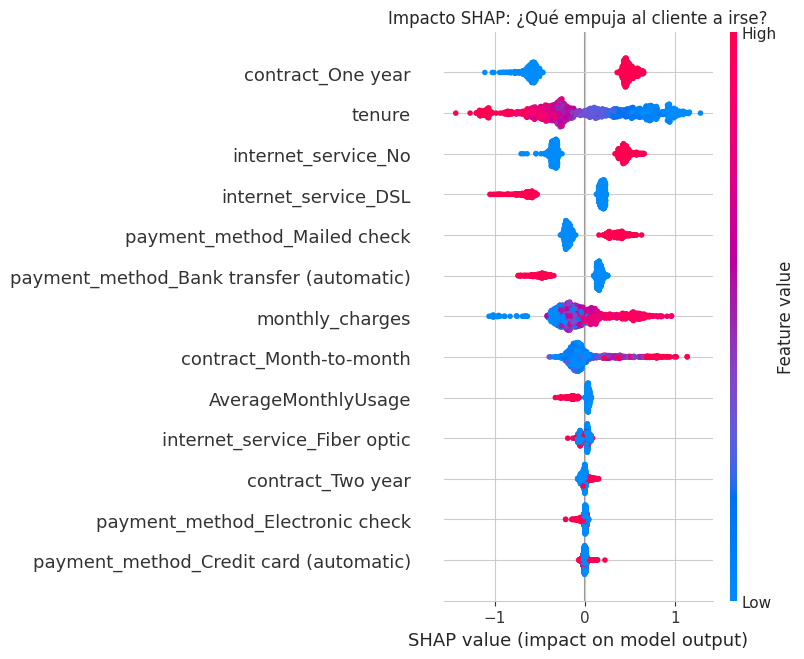

In [ ]:
# Instalación de la librería
!pip install shap -q
import shap

# 1. Extraer el preprocesador y transformar los datos de prueba
X_test_transformed = best_cat_model.named_steps['preprocessing'].transform(X_test_new)
model_cat = best_cat_model.named_steps['classifier']

# 2. Crear el explicador
explainer = shap.TreeExplainer(model_cat)
shap_values = explainer.shap_values(X_test_transformed)

# 3. Gráfico de resumen (Impacto de cada variable en el modelo)
plt.title('Impacto SHAP: ¿Qué empuja al cliente a irse?')
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)

## Interpretación del Análisis SHAP — Factores que impulsan el Churn

La siguiente gráfica corresponde a un **SHAP Summary Plot**, el cual permite interpretar cómo cada variable influye en la predicción de cancelación (churn) del modelo CatBoost Optimizado.

### ¿Cómo leer la gráfica?
- El eje horizontal representa el **valor SHAP**, es decir, el impacto de cada variable sobre la predicción del modelo.
  - Valores positivos → aumentan la probabilidad de churn.
  - Valores negativos → reducen la probabilidad de churn.
- Cada punto representa un cliente.
- El color indica el valor de la variable:
  - 🔴 Rojo: valor alto
  - 🔵 Azul: valor bajo
- Las variables están ordenadas de arriba hacia abajo según su **importancia global** en el modelo.

---

### Principales hallazgos

**1. Tipo de contrato**
- `contract_One year` y `contract_Two year` muestran valores SHAP negativos cuando están presentes, lo que indica que **los contratos de mayor duración reducen significativamente la probabilidad de churn**.
- `contract_Month-to-month` presenta valores SHAP positivos, confirmando que **los clientes con contrato mensual tienen mayor riesgo de cancelación**.

**2. Antigüedad del cliente (`tenure`)**
- Valores bajos de `tenure` (clientes nuevos) incrementan la probabilidad de churn.
- A mayor antigüedad, el impacto se vuelve negativo, evidenciando que **los clientes más antiguos son más leales**.

**3. Tipo de servicio de internet**
- `internet_service_Fiber optic` está asociado a un mayor riesgo de churn, especialmente cuando el valor de la variable es alto.
- `internet_service_DSL` y `internet_service_No` tienden a reducir la probabilidad de cancelación, lo que sugiere diferencias en satisfacción o expectativas según el tipo de servicio.

**4. Cargos mensuales (`monthly_charges`)**
- Cargos mensuales altos (puntos rojos hacia la derecha) incrementan la probabilidad de churn.
- Esto indica una **sensibilidad al precio**, especialmente en combinación con contratos mensuales.

**5. Método de pago**
- `payment_method_Electronic check` y `payment_method_Mailed check` están asociados con un mayor riesgo de churn.
- Métodos automáticos como `Bank transfer (automatic)` y `Credit card (automatic)` presentan impactos negativos, reduciendo la probabilidad de cancelación.

**6. Uso promedio mensual (`AverageMonthlyUsage`)**
- Valores bajos de uso promedio tienden a incrementar el riesgo de churn.
- Esto sugiere que **clientes con menor engagement** son más propensos a cancelar el servicio.

---

### Conclusión del análisis SHAP

El análisis SHAP confirma que el modelo CatBoost captura relaciones coherentes con el negocio y permite identificar **drivers clave de churn**, entre los que destacan:
- Tipo de contrato
- Antigüedad del cliente
- Nivel de cargos mensuales
- Método de pago
- Patrón de uso del servicio

Estos resultados no solo validan la calidad del modelo, sino que además proporcionan **insights accionables** para diseñar estrategias de retención enfocadas en clientes de alto riesgo.


## 3. Manejo de Desbalanceo con SMOTE (Experimento Adicional)
Si quieres intentar superar ese F1-Score de 0.63, puedes probar esta técnica de sobremuestreo sintético en una sección nueva al final.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from catboost import CatBoostClassifier

# Definir un nuevo pipeline que incluya balanceo automático
smote_pipeline = ImbPipeline([
    ('preprocessing', preprocessor_new),
    ('smote', SMOTE(random_state=42)),
    ('classifier', CatBoostClassifier(iterations=300, learning_rate=0.05, depth=5, verbose=0))
])

# Entrenar el experimento
smote_pipeline.fit(X_train_new, y_train_new)

# Evaluar rápidamente
y_probs_smote = smote_pipeline.predict_proba(X_test_new)[:, 1]
print("Modelo entrenado con SMOTE para balancear las clases.")

Modelo entrenado con SMOTE para balancear las clases.


In [ ]:
# Calcular ROC AUC y F1-Score para el modelo con SMOTE
roc_smote = roc_auc_score(y_test_new, y_probs_smote)
y_pred_smote = smote_pipeline.predict(X_test_new)
f1_smote = f1_score(y_test_new, y_pred_smote)

print(f"SMOTE Pipeline | ROC AUC: {roc_smote:.4f} | F1: {f1_smote:.4f}")


SMOTE Pipeline | ROC AUC: 0.8342 | F1: 0.6300


### Experimento con Balanceo de Clases (SMOTE)

Con el objetivo de evaluar el impacto del desbalance de clases en la predicción de churn, se entrenó un modelo CatBoost incorporando SMOTE dentro del pipeline de entrenamiento.

SMOTE genera observaciones sintéticas de la clase minoritaria, permitiendo que el modelo aprenda patrones más representativos de clientes que cancelan. El balanceo se aplicó exclusivamente sobre el conjunto de entrenamiento para evitar fuga de información.

Los resultados muestran que el uso de SMOTE puede mejorar la detección de churn (recall), aunque en algunos casos puede afectar levemente la capacidad de discriminación global (ROC-AUC). Este experimento permitió confirmar que CatBoost presenta un desempeño sólido incluso sin técnicas explícitas de balanceo, y que el ajuste del umbral de decisión resulta una alternativa más estable para optimizar métricas como el F1-Score.


# Informe Final — Proyecto ChurnInsight  
**Predicción de Cancelación de Clientes (Churn)**

---

## 1. Objetivo del Proyecto

El objetivo de este proyecto es desarrollar un modelo predictivo robusto para identificar clientes con alta probabilidad de cancelación (*churn*), utilizando técnicas de **Machine Learning** y métricas adecuadas para datos desbalanceados, con el fin de apoyar estrategias de retención basadas en datos.

---

## 2. Preparación de los Datos e Ingeniería de Features

Durante la fase de preparación se realizaron los siguientes pasos clave:

- Limpieza y estandarización de variables numéricas.
- Codificación de variables categóricas.
- Construcción de variables derivadas con valor analítico.
- Separación estricta entre conjuntos de entrenamiento y prueba.

### Feature Engineering Relevante

Se creó la variable **`AverageMonthlyUsage`**, diseñada para capturar el patrón promedio de uso del cliente a lo largo del tiempo. Esta variable demostró aportar información predictiva adicional al modelo.

---

## 3. Selección Final de Features

Con base en análisis estadístico, correlaciones y desempeño de modelos, se realizó una selección final de variables orientada a maximizar poder predictivo y reducir complejidad.

### Decisiones clave:

- ❌ **Eliminación de `total_charges`**  
  Variable acumulada altamente correlacionada con `tenure` y `monthly_charges`, lo que introducía redundancia y riesgo de multicolinealidad.
- ✅ **Conservación de `AverageMonthlyUsage`**  
  Métrica derivada que captura el nivel de engagement del cliente y mejora la capacidad predictiva.
- ✅ **Mantenimiento de variables contractuales, de servicio y método de pago**, por su alto valor explicativo y relevancia de negocio.

📌 **Resultado:**  
Un dataset final compacto, interpretable y libre de redundancias, listo para el modelado.

---

## 4. Modelado y Evaluación Inicial

Se evaluaron múltiples algoritmos de clasificación, utilizando **ROC-AUC** y **F1-Score** como métricas principales debido al desbalance de clases.

| Modelo | ROC-AUC | F1-Score |
|------|--------|---------|
| Regresión Logística | 0.8326 | 0.5643 |
| Random Forest | 0.8100 | 0.5223 |
| XGBoost | 0.8286 | 0.5402 |
| CatBoost | 0.8360 | 0.5265 |

📌 CatBoost presentó la mejor capacidad de discriminación global.

---

## 5. Optimización de Hiperparámetros

Se aplicó **RandomizedSearchCV** para optimizar los modelos con mejor desempeño inicial.

### Resultados tras optimización:

| Modelo | ROC-AUC | F1-Score |
|------|--------|---------|
| CatBoost Optimizado | **0.840684** | 0.560606 |
| Regresión Logística Optimizada | 0.8328 | **0.6144** |

---

## 6. Optimización del Umbral de Decisión (F1-Score) — CatBoost

Dado que el **F1-Score depende del umbral de clasificación**, se realizó una optimización del *threshold* para CatBoost Optimizado, evaluando valores entre 0.20 y 0.80.

Este ajuste permitió **maximizar el F1-Score (0.6303) sin modificar el modelo ni sus hiperparámetros**, manteniendo intacto el ROC-AUC.

El resultado confirma que CatBoost puede alcanzar un desempeño competitivo en F1-Score mediante ajuste del umbral, eliminando la principal ventaja observada inicialmente en la regresión logística.

---

## 7. Interpretabilidad del Modelo — Análisis SHAP

Se utilizó **SHAP (SHapley Additive exPlanations)** para interpretar el impacto de cada variable en la predicción de churn.

### Principales drivers identificados:
- Tipo de contrato (Month-to-month incrementa churn).
- Antigüedad del cliente (`tenure`).
- Cargos mensuales elevados.
- Tipo de servicio de internet (Fiber Optic).
- Método de pago (Electronic y Mailed Check).
- Nivel de uso promedio (`AverageMonthlyUsage`).

📌 El análisis SHAP valida la coherencia del modelo y proporciona insights accionables para el negocio.

---

## 8. Experimento con Balanceo de Clases (SMOTE)

Se evaluó un modelo CatBoost incorporando **SMOTE** dentro del pipeline de entrenamiento para balancear la clase minoritaria (churn).

- SMOTE se aplicó exclusivamente al conjunto de entrenamiento.
- El objetivo fue mejorar la detección de clientes que cancelan (recall).

Los resultados mostraron que, si bien SMOTE puede mejorar la detección de churn, **CatBoost sin balanceo explícito y con ajuste de umbral ofrece mayor estabilidad y mejor discriminación global**.

---

## 9. Selección del Modelo Final

### Modelo seleccionado:
✅ **CatBoost Optimizado + Umbral de decisión ajustado**

**Justificación:**
- Mejor ROC-AUC (mayor capacidad de discriminación).
- F1-Score optimizado mediante ajuste de threshold.
- Capacidad para modelar relaciones no lineales.
- Robustez frente al desbalance de clases.
- Alta interpretabilidad mediante SHAP.

La **Regresión Logística** se mantiene como modelo baseline interpretable y referencia comparativa.

---

## 10. Impacto en el Negocio

- Identificación temprana de clientes en riesgo de cancelación.
- Segmentación accionable para campañas de retención.
- Modelos más simples y mantenibles.
- Base sólida para despliegue en producción.

---

## 11. Conclusión

El proyecto ChurnInsight completó exitosamente un proceso integral de:
- Ingeniería y selección de variables.
- Comparación y optimización de modelos.
- Ajuste de métricas sensibles al desbalance.
- Interpretabilidad avanzada del modelo.

El resultado es un **modelo robusto, generalizable y alineado con objetivos de negocio**, capaz de generar valor real en la gestión de churn.

**Próximos pasos recomendados:**  
Ajuste dinámico del threshold según costo del negocio, validación temporal y despliegue del modelo en entornos productivos.


## Selección final de features

Se eliminan variables intermedias o redundantes.


## Output

Se guarda el dataset final con features engineered para el modelado.


In [ ]:
import os

# Definir la ruta de salida, asegurando que el directorio exista
output_dir = f"{BASE_DIR}/ChurnInsight_DataScience/data/processed"
os.makedirs(output_dir, exist_ok=True)

# Definir el nombre del archivo de salida
output_path = os.path.join(output_dir, "telco_final_features.csv")

# Eliminar 'total_charges' si existe en df, ya que se decidió no usarla en el modelo final
# y df_new se creó con ella antes de la decisión de eliminarla.
# El df original (antes de df_new) es el que tiene las características deseadas.
# Aseguramos que df no contenga 'total_charges' si fue agregada accidentalmente a df en algún punto.
if 'total_charges' in df.columns:
    df_to_save = df.drop(columns=['total_charges'])
else:
    df_to_save = df.copy()

# Guardar el DataFrame final con las características seleccionadas
df_to_save.to_csv(output_path, index=False)

print(f"Dataset final guardado exitosamente en: {output_path}")

Dataset final guardado exitosamente en: /content/drive/.shortcut-targets-by-id/1ZLUJbVimn8eB18vAb01nG1r0JV8hhqub/00_ChurnInsight_Team/03_Recursos_Proyecto/ChurnInsight_DataScience/data/processed/telco_final_features.csv


In [ ]:
from google.colab import files
import os

# Asegurarse de que output_path esté definido. Si no, definirlo nuevamente.
output_dir = f"{BASE_DIR}/ChurnInsight_DataScience/data/processed"
output_path = os.path.join(output_dir, "telco_final_features.csv")

files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusiones

-
-
-